In [1]:
import numpy as np
import pandas as pd

In [2]:
import lightgbm as lgbm

In [3]:
from numpy.random import RandomState
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [4]:
import time

In [5]:
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('train_pred.csv')
test = pd.read_csv('test_pred.csv')

In [40]:
test.shape

(123623, 1741)

In [7]:
train = train.drop(train.columns.tolist()[0], axis = 1)
test  = test.drop(test.columns.tolist()[0], axis = 1)

In [8]:
def feature_selection_wrapper(train, test):
    print('Feaure selection wrapper working')
    
    name = 'card_id'
    label = 'target'
    features = train.columns.tolist()
    features.remove(name)
    features.remove(label)
    
    params_initial = {
        'num_leaves': 31
        , 'learning_rate': 0.1
        , 'boosting': 'gbdt'
        , 'min_child_samples': 20
        , 'bagging_seed': 99
        , 'bagging_fraction': 0.7
        , 'bagging_freq': 1
        , 'feature_fraction': 0.7
        , 'max_depth': -1
        , 'metric': 'rmse'
        , 'reg_alpha': 0
        , 'reg_lambda': 1
        , 'objective': 'regression'
    
    }
    ESR, NBR, VBE = 30, 10000, 50
    
    kf = KFold(n_splits=5, random_state=99, shuffle=True)
    fse = pd.Series(0, index= features)
    
    for train_part_idx, eval_idx in kf.split(train[features], train[label]):
        
        train_part = lgbm.Dataset(train[features].loc[train_part_idx], train[label].loc[train_part_idx])
        eval_part = lgbm.Dataset(train[features].loc[eval_idx], train[label].loc[eval_idx])
        
        bst = lgbm.train(params_initial, train_part, valid_sets=[train_part, eval_part], valid_names=['train', 'eval']
                         , early_stopping_rounds=ESR, keep_training_booster=NBR, verbose_eval= VBE
        )
        
        fse += pd.Series(bst.feature_importance(),index=features)
        
        feature_selection = fse.sort_values(ascending=False).index.tolist()[:300]
    
    fse.to_csv('feature_importance_wrapper.csv')
    print('FSW complete')
    return train[[name] + feature_selection + [label]], test[[name] + feature_selection]

In [9]:
train_LGBMwrapper, test_LGBMwrapper = feature_selection_wrapper(train, test)

Feaure selection wrapper working


/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.340910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 227186
[LightGBM] [Info] Number of data points in the train set: 161533, number of used features: 1629
[LightGBM] [Info] Start training from score -0.387603
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.42335	eval's rmse: 3.756
[100]	train's rmse: 3.30229	eval's rmse: 3.75255
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 3.30229	eval's rmse: 3.75255


/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.337305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226970
[LightGBM] [Info] Number of data points in the train set: 161533, number of used features: 1628
[LightGBM] [Info] Start training from score -0.391308
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.44786	eval's rmse: 3.68799
[100]	train's rmse: 3.32862	eval's rmse: 3.68532
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 3.32862	eval's rmse: 3.68532


/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.331487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 227038
[LightGBM] [Info] Number of data points in the train set: 161534, number of used features: 1629
[LightGBM] [Info] Start training from score -0.396074
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.45028	eval's rmse: 3.68793
[100]	train's rmse: 3.33537	eval's rmse: 3.68746
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 3.33537	eval's rmse: 3.68746


/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.375702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 227071
[LightGBM] [Info] Number of data points in the train set: 161534, number of used features: 1625
[LightGBM] [Info] Start training from score -0.399754
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.46316	eval's rmse: 3.6492
[100]	train's rmse: 3.34088	eval's rmse: 3.64922
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 3.34088	eval's rmse: 3.64922


/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.399406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 227014
[LightGBM] [Info] Number of data points in the train set: 161534, number of used features: 1628
[LightGBM] [Info] Start training from score -0.393443
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.44574	eval's rmse: 3.67141
Early stopping, best iteration is:
[58]	train's rmse: 3.42506	eval's rmse: 3.67049
FSW complete


In [19]:
feature_imp_wrap = pd.read_csv('feature_importance_wrapper.csv')

##### feature_imp_wrap.head()

In [11]:
feature_imp_wrap.describe()

,0
count,1740.000000
mean,7.258621
std,15.172757
min,0.000000
25%,0.000000
50%,1.000000
75%,8.000000
max,212.000000


(array([[1.800e+01, 1.700e+01, 1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01,
         1.700e+01, 1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01,
         1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01, 1.800e+01,
         1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01,
         1.700e+01, 1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01,
         1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01, 1.800e+01,
         1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01,
         1.700e+01, 1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01,
         1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01, 1.800e+01,
         1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01, 1.800e+01, 1.700e+01,
         1.700e+01, 1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01,
         1.800e+01, 1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01, 1.800e+01,
         1.700e+01, 1.700e+01, 1.800e+01, 1.700e+01, 1.800e+01, 1.700e+01,
         1.700e+01, 1.800

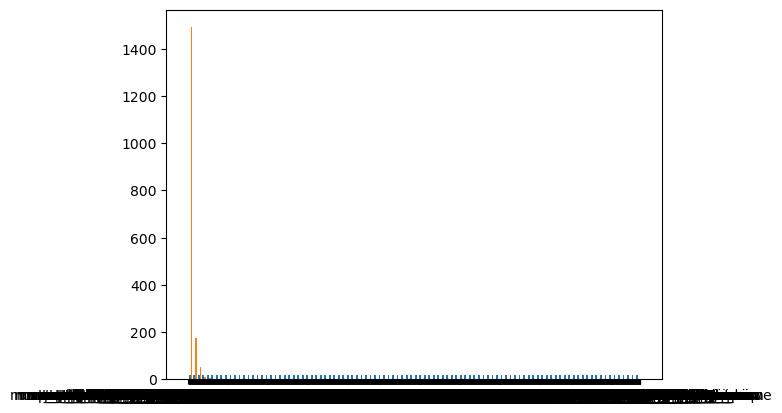

In [12]:
plt.figure()
plt.hist(feature_imp_wrap, bins = 100, )

In [10]:
def params_append(params):
    
    params['feature_pre_filter'] = False
    params['objective'] = 'regression'
    params['metric'] = 'rmse'
    params['bagging_seed'] = 99
    
    return params

In [13]:
def param_hyperopt(train):
    print('Parameter hyper optimization working')
    
    features = train.columns.tolist()
    features.remove('card_id')
    features.remove('target')
    
    train_data = lgbm.Dataset(train[features], train['target'])
    
    def hyperopt_objective(params):
        params = params_append(params)
        print(params)
        
        res = lgbm.cv(params, 
                      train_data,
                      1000,
                      nfold=2,
                      stratified=False,
                      shuffle=True,
                      metrics='rmse',
                      early_stopping_rounds=20,
                      verbose_eval=False,
                      show_stdv=False,
                      seed=99)
        
        return min(res['rmse-mean'])
    
    params_space = {
        'learning_rate': hp.uniform('learning_rate', 1e-2, 5e-1),
        'bagging_fraction': hp.uniform('bagging_fraction', 0.5, 1),
        'feature_fraction': hp.uniform('feature_fraction', 0.5, 1),
        'num_leaves': hp.choice('num_leaves', list(range(10,301,10))),
        'reg_alpha': hp.randint('reg_alpha', 0,10),
        'reg_lambda': hp.uniform('reg_lambda', 0,10),
        'bagging_frequency': hp.randint('bagging_frequency', 0,10),
        'min_child_samples': hp.choice('min_child_samples', list(range(1,31,5))),
    }
    
    params_best = fmin(hyperopt_objective, 
                      space=params_space,
                       algo=tpe.suggest,
                       max_evals=30,
                       rstate=np.random.default_rng(99)
                    )
    return params_best
        

In [14]:
best_clf = param_hyperopt(train_LGBMwrapper)

Parameter hyper optimization working
{'bagging_fraction': 0.83394292426786, 'bagging_frequency': 3, 'feature_fraction': 0.5505176174601247, 'learning_rate': 0.04700622267515105, 'min_child_samples': 26, 'num_leaves': 90, 'reg_alpha': 2, 'reg_lambda': 3.87092153777453, 'feature_pre_filter': False, 'objective': 'regression', 'metric': 'rmse', 'bagging_seed': 99}
[LightGBM] [Warning] Unknown parameter: bagging_frequency
  0%|          | 0/30 [00:00<?, ?trial/s, best loss=?]

/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66949                    
[LightGBM] [Info] Number of data points in the train set: 100958, number of used features: 300
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66949                    
[LightGBM] [Info] Number of data points in the train set: 100958, number of used features: 300
[LightGBM] [Warn

/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "



{'bagging_fraction': 0.9386402440403612, 'bagging_frequency': 4, 'feature_fraction': 0.6306790074884632, 'learning_rate': 0.3591519852379942, 'min_child_samples': 16, 'num_leaves': 150, 'reg_alpha': 8, 'reg_lambda': 1.5769260367383686, 'feature_pre_filter': False, 'objective': 'regression', 'metric': 'rmse', 'bagging_seed': 99}
[LightGBM] [Warning] Unknown parameter: bagging_frequency                     
[LightGBM] [Warning] Unknown parameter: bagging_frequency                     
[LightGBM] [Warning] Unknown parameter: bagging_frequency                     
[LightGBM] [Warning] Unknown parameter: bagging_frequency                     
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66949                                            
[LightGBM] [Info] Number of data points in the train set: 100958, number of used features: 300
[LightGBM] [War

/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: bagging_frequency                     
[LightGBM] [Warning] Unknown parameter: bagging_frequency                     
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66949                                            
[LightGBM] [Info] Number of data points in the train set: 100958, number of used features: 300
[LightGBM] [Warning] Unknown parameter: bagging_frequency                     
[LightGBM] [Info] Start training from score -0.381506                         
[LightGBM] [Info] Start training from score -0.405767                         
{'bagging_fraction': 0.8891625960470265, 'bagging_frequency': 4, 'feature_fraction': 0.800936211274754, 'learning_rate': 0.15713929344213737, 'min_child_samples': 11, 'num_leaves': 10, 'reg_alpha': 9, 'reg_lambda': 9.945366399325135, 'feature_pre_filter': False, 'ob

In [15]:
best_clf

{'bagging_fraction': 0.5071446955487892,
 'bagging_frequency': 0,
 'feature_fraction': 0.7066461083488597,
 'learning_rate': 0.01114741291316183,
 'min_child_samples': 0,
 'num_leaves': 10,
 'reg_alpha': 6,
 'reg_lambda': 7.094175717510358}

In [16]:
best_clf = params_append(best_clf)

features = train_LGBMwrapper.columns.tolist()
features.remove('card_id')
features.remove('target')
    
lgbm_data = lgbm.Dataset(train[features], train['target'])

bst = lgbm.train(best_clf, lgbm_data)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.161733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66949
[LightGBM] [Info] Number of data points in the train set: 201917, number of used features: 300
[LightGBM] [Info] Start training from score -0.393636


In [18]:
lgbm_train_pred = bst.predict(train_LGBMwrapper[features])

In [23]:
np.sqrt(mean_squared_error(train_LGBMwrapper['target'], lgbm_train_pred))

3.7249551755041335

In [37]:
test_LGBMwrapper['target'] = bst.predict(test_LGBMwrapper[features])

In [42]:
test_LGBMwrapper[['card_id', 'target']].to_csv('submission_lgbm.csv', index = False)

In [71]:
def train_predict(train, test, params):
    
    features = train.columns.tolist()
    features.remove('card_id')
    features. remove('target')
    
    params = params_append(params)
    ESR, NBR, VBE = 30, 10000, 50
    
    prediction_test = 0
    cv_score = []
    prediction_train = pd.Series()
    
    kf = KFold(n_splits=5, shuffle=True, random_state=2023)
    for train_part_idx, eval_idx in kf.split(train[features], train['target']):
        
        train_part = lgbm.Dataset(train[features].loc[train_part_idx], train['target'].loc[train_part_idx])
        eval_part = lgbm.Dataset(train[features].loc[eval_idx], train['target'].loc[eval_idx])
        
        bst = lgbm.train(params, train_part, valid_sets=[train_part, eval_part], valid_names=['train', 'eval']
                         , early_stopping_rounds=ESR, keep_training_booster=NBR, verbose_eval= VBE
                        )
        
        prediction_train_temp = bst.predict(train[features].iloc[eval_idx])
        prediction_train = pd.concat([prediction_train, pd.Series(prediction_train_temp, index = eval_idx)])
        prediction_test += bst.predict(test[features])
        score = np.sqrt(mean_squared_error(prediction_train_temp, train['target'].iloc[eval_idx]))
        cv_score.append(score)
        
    print('Cross Validation Score:', cv_score, sum(cv_score)/5)
    pd.Series(prediction_train.sort_index().values).to_csv('train_lgbmcv.csv', index = False)
    pd.Series(prediction_test/5).to_csv('test_lgbmcv.csv', index = False)
    test['target'] = prediction_test / 5
    test[['card_id', 'target']].to_csv('submission_lgbmcv.csv', index = False)
    return

In [72]:
train_predict(train_LGBMwrapper, test_LGBMwrapper, best_clf)

/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66684
[LightGBM] [Info] Number of data points in the train set: 161533, number of used features: 300
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score -0.389966
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.74192	eval's rmse: 3.86725
[100]	train's rmse: 3.70054	eval's rmse: 3.83035
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 3.70054	eval's rmse: 3.83035


/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.118917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66668
[LightGBM] [Info] Number of data points in the train set: 161533, number of used features: 300
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score -0.398532
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.77596	eval's rmse: 3.72424
[100]	train's rmse: 3.73272	eval's rmse: 3.69269
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 3.73272	eval's rmse: 3.69269


/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66702
[LightGBM] [Info] Number of data points in the train set: 161534, number of used features: 300
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score -0.393677
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.77403	eval's rmse: 3.73309
[100]	train's rmse: 3.7319	eval's rmse: 3.69678
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 3.7319	eval's rmse: 3.69678


/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66625
[LightGBM] [Info] Number of data points in the train set: 161534, number of used features: 300
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score -0.391203
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.77024	eval's rmse: 3.74775
[100]	train's rmse: 3.72773	eval's rmse: 3.71196
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 3.72773	eval's rmse: 3.71196


/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/keweilu/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.138691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66658
[LightGBM] [Info] Number of data points in the train set: 161534, number of used features: 300
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score -0.394803
Training until validation scores don't improve for 30 rounds
[50]	train's rmse: 3.76172	eval's rmse: 3.78663
[100]	train's rmse: 3.71941	eval's rmse: 3.7518
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 3.71941	eval's rmse: 3.7518
Cross Validation Score: [3.830346032432482, 3.6926875595546895, 3.6967828367011877, 3.7119583893390704, 3.7518000549765107] 3.736714974600788
